In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import pandas as pd

In [ ]:
file = open('drive/My Drive/gssoc/preprocessed/id2word.txt','rb')
id2word = pickle.load(file)
file.close()

In [ ]:
print(id2word)

Dictionary(55850 unique tokens: ['file', 'html', 'info', 'leader', 'learn']...)


In [ ]:
file = open('drive/My Drive/gssoc/preprocessed/data_lemmatized.txt','rb')
data_lemmatized = pickle.load(file)
file.close()

In [ ]:
print(data_lemmatized[:2])

[['info', 'page', 'file', 'wait', 'team', 'leader', 'process', 'learn', 'html'], ['team', 'member', 'draw', 'mail', 'mail']]


In [ ]:
file = open('drive/My Drive/gssoc/preprocessed/corpus.txt','rb')
corpus = pickle.load(file)
file.close()

In [ ]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]


In [ ]:
pip uninstall gensim

Uninstalling gensim-3.6.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/gensim-3.6.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/gensim/*
Proceed (y/n)? y
  Successfully uninstalled gensim-3.6.0


In [ ]:
pip install gensim

     |████████████████████████████████| 24.2MB 1.3MB/s 


In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
lda_model = gensim.models.LdaModel(corpus=corpus,
                                  id2word=id2word,
                                  num_topics=20,
                                  random_state=0,
                                  update_every=1,
                                  chunksize=100,
                                  passes=1,
                                  alpha='auto',
                                  per_word_topics='True')

In [ ]:
file = open('drive/My Drive/gssoc/pickle/lda_model_pkl','rb')
lda_model_pkl = pickle.load(file)
file.close()

In [ ]:
print(lda_model_pkl.print_topics())

[(0, '0.190*"ask" + 0.148*"woman" + 0.127*"question" + 0.115*"moment" + 0.098*"answer" + 0.076*"young" + 0.051*"mother" + 0.037*"wife" + 0.035*"husband" + 0.016*"repeat"'), (1, '0.066*"away" + 0.045*"walk" + 0.039*"hand" + 0.039*"heart" + 0.038*"fall" + 0.037*"face" + 0.036*"stand" + 0.035*"hold" + 0.033*"open" + 0.031*"close"'), (2, '0.110*"water" + 0.106*"run" + 0.105*"link" + 0.068*"add" + 0.054*"trust" + 0.044*"chat" + 0.044*"video" + 0.041*"photo" + 0.031*"cream" + 0.028*"danger"'), (3, '0.082*"tri" + 0.079*"suggest" + 0.066*"blood" + 0.046*"smell" + 0.044*"ride" + 0.041*"wind" + 0.038*"hit" + 0.037*"round" + 0.036*"intern" + 0.035*"bless"'), (4, '0.155*"hate" + 0.120*"child" + 0.052*"form" + 0.052*"exist" + 0.052*"student" + 0.046*"public" + 0.043*"nation" + 0.043*"program" + 0.042*"state" + 0.038*"folk"'), (5, '0.134*"food" + 0.112*"eat" + 0.100*"pay" + 0.077*"vote" + 0.076*"put" + 0.054*"dear" + 0.046*"cost" + 0.043*"coffe" + 0.041*"fish" + 0.036*"meal"'), (6, '0.494*"school" +

In [ ]:
print('\nPerplexity: ', lda_model_pkl.log_perplexity(corpus)) 


Perplexity:  -11.496303696483185


In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model_pkl, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

In [ ]:
print(coherence_lda)

0.35765087513967575


In [ ]:
pip install pyLDavis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_pkl, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14     0.331605 -0.048383       1        1  61.948946
1      0.281501  0.022208       2        1   5.498195
18     0.105021  0.139405       3        1   4.414739
7      0.069289  0.043699       4        1   3.214518
11     0.018066  0.013248       5        1   2.791930
16    -0.011750  0.145537       6        1   2.416317
12    -0.041693  0.072468       7        1   2.373912
13     0.029277 -0.338573       8        1   1.912678
19    -0.058477  0.041655       9        1   1.694160
4     -0.054396  0.039886      10        1   1.637629
0     -0.059651  0.039664      11        1   1.570736
15    -0.059847  0.029707      12        1   1.487531
17    -0.033858  0.017346      13        1   1.456102
8     -0.065745  0.022467      14        1   1.381988
9     -0.046752  0.023177      15        1   1.368820
3     -0.080345  0.005349      16        1   1.091421
2     -0.083209  0.000928      17        1   1.051622
5     -0.083781  0.000075      18        1   1.000801
10    -0.085188 -0.002056      19        1   0.935427
6     -0.070067 -0.267806      20        1   0.752527, topic_info=         Term           Freq          Total Category  logprob  loglift
681      love  254700.000000  254700.000000  Default  30.0000  30.0000
669     write  134517.000000  134517.000000  Default  29.0000  29.0000
370    school   95731.000000   95731.000000  Default  28.0000  28.0000
745     night  135413.000000  135413.000000  Default  27.0000  27.0000
342      read  123889.000000  123889.000000  Default  26.0000  26.0000
...       ...            ...            ...      ...      ...      ...
1669  forward       0.069186       1.263133  Topic20 -14.8457   1.9849
1679  serious       0.069185       1.263096  Topic20 -14.8457   1.9850
1743    shall       0.069187       1.263162  Topic20 -14.8457   1.9849
1921    worth       0.069185       1.263102  Topic20 -14.8457   1.9850
1744   appear       0.069186       1.263156  Topic20 -14.8457   1.9849

[706 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1647     17  0.999713  abandon
807       1  0.517771   accept
807       8  0.482194   accept
496       7  0.999873  account
1043     13  0.999923   action
...     ...       ...      ...
486       1  0.999994     work
669       5  0.999989    write
540       1  0.999992     year
948      16  0.999869   yellow
755      11  0.999967    young

[612 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 2, 19, 8, 12, 17, 13, 14, 20, 5, 1, 16, 18, 9, 10, 4, 3, 6, 11, 7])

In [ ]:
mallet_path = 'drive/My Drive/gssoc/mallet-2.0.8/bin/mallet'

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20,id2word=id2word)

CalledProcessError: ignored

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns: 
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus,
                                  id2word=id2word,
                                  num_topics=num_topics,
                                  random_state=0)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=20, step=5)

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4124
Num Topics = 7  has Coherence Value of 0.4368
Num Topics = 12  has Coherence Value of 0.4517
Num Topics = 17  has Coherence Value of 0.4581


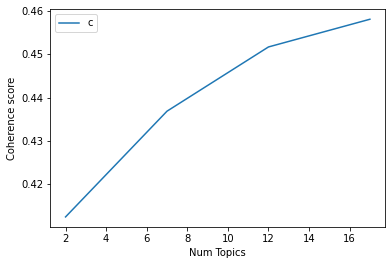

In [ ]:
limit=20; start=2; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=21, limit=40, step=5)

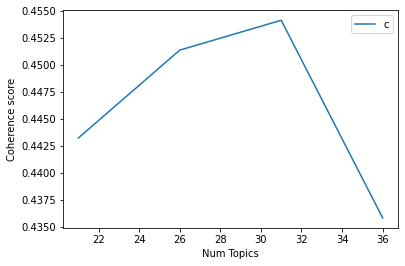

In [ ]:
limit=40; start=21; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 21  has Coherence Value of 0.4432
Num Topics = 26  has Coherence Value of 0.4514
Num Topics = 31  has Coherence Value of 0.4541
Num Topics = 36  has Coherence Value of 0.4358


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns: 
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for passes in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus,
                                  id2word=id2word,
                                  num_topics=31,
                                  random_state=0,
                                  passes=passes)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=0, limit=20, step=5)

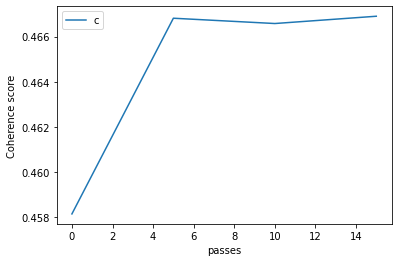

In [ ]:
limit=20; start=0; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("passes")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("passes =", m, " has Coherence Value of", round(cv, 4))

passes = 0  has Coherence Value of 0.4581
passes = 5  has Coherence Value of 0.4668
passes = 10  has Coherence Value of 0.4666
passes = 15  has Coherence Value of 0.4669
